# Top Movies by Number of Reviews FAIL
### Hypothesis:
Movies with a higher number of reviews are more popular or widely discussed. showing the top 10 movies sorted by the number of reviews

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = "../data/merged_dataset.csv"

df = pd.read_csv(data_path)

In [30]:

# Ensure that 'num_reviews' and 'num_raters' are numeric
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')
df['num_raters'] = pd.to_numeric(df['num_raters'], errors='coerce')

# Drop rows with NaN values in either 'num_reviews' or 'num_raters'
df = df.dropna(subset=['num_reviews', 'num_raters'])


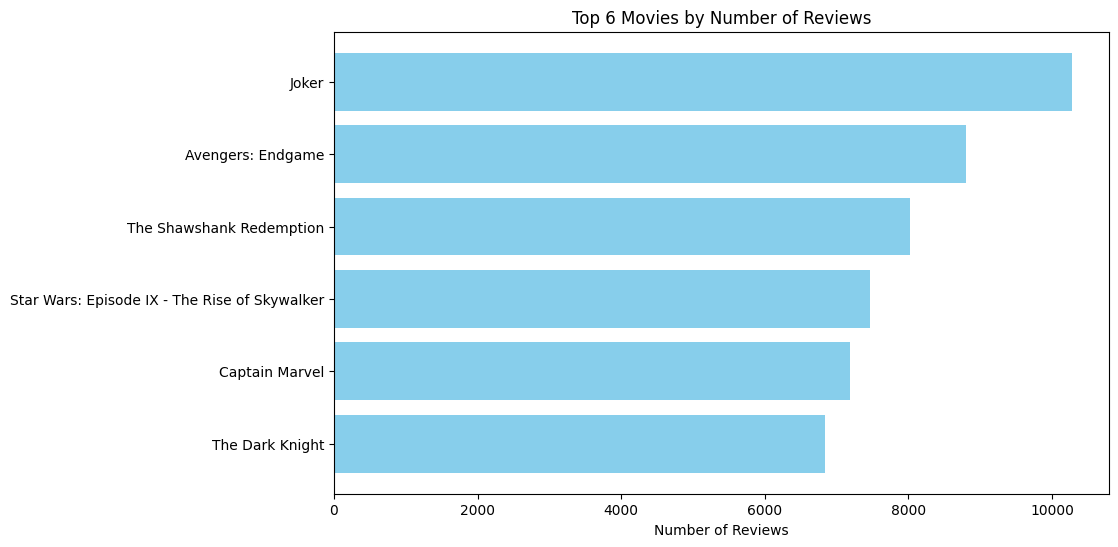

In [33]:
# Sort the movies by "num_raters" in descending order and get the top 6
top_movies = df[["name", "num_reviews"]].sort_values(by="num_reviews", ascending=False).head(10)

# Plotting the data
plt.figure(figsize=(10,6))
plt.barh(top_movies['name'], top_movies['num_reviews'], color='skyblue')
plt.title('Top 6 Movies by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.gca().invert_yaxis()  # Invert y-axis so the movie with the highest reviews is at the top

# Adjust the layout to avoid cropping
#plt.tight_layout()  # Automatically adjusts the plot to fit everything

# Saving the plot to the Plots folder
plt.savefig('../plots/Top 6 movies by number of reviews plain.png')

# Show the plot
plt.show()

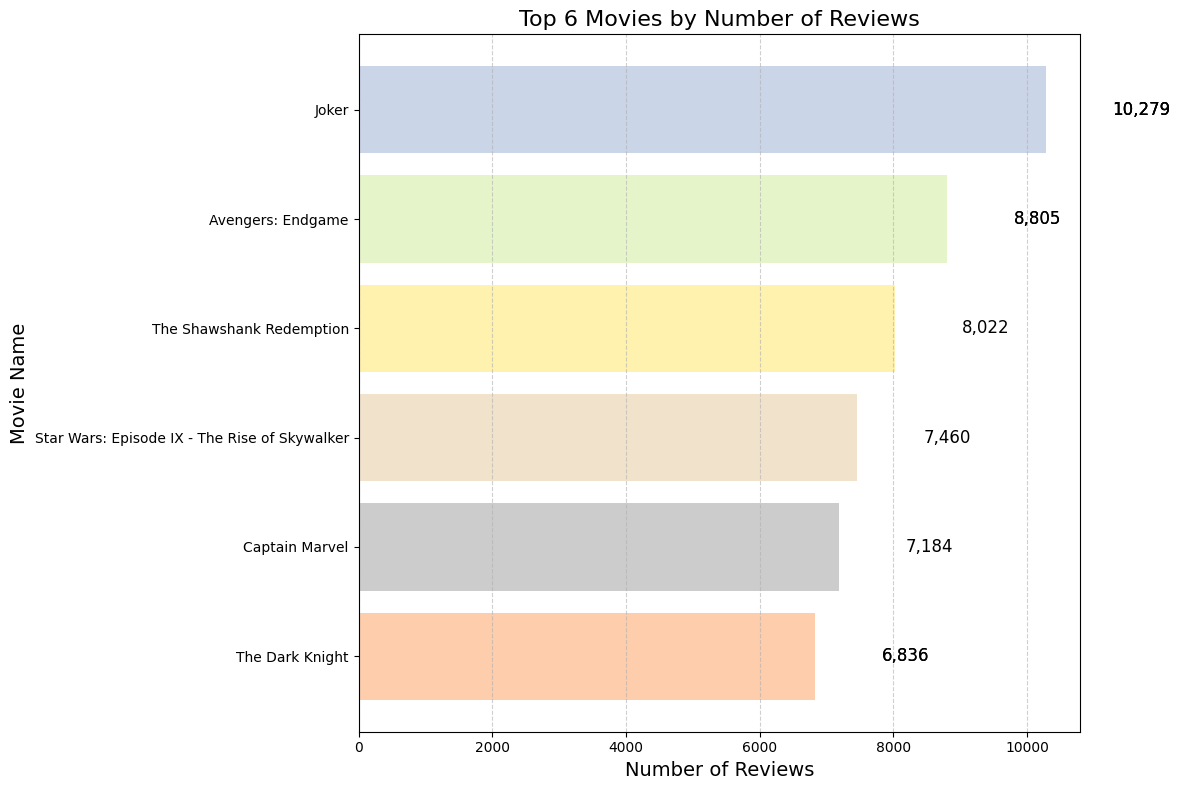

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette from seaborn
colors = sns.color_palette("Pastel2", len(top_movies))

# Identify the index of the movie with the most reviews
max_index = top_movies['num_reviews'].idxmax()


# Plotting
plt.figure(figsize=(12,8))
bars = plt.barh(top_movies['name'], top_movies['num_reviews'], color=colors)
plt.title('Top 6 Movies by Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Movie Name', fontsize=14)
plt.gca().invert_yaxis()

# Adding data labels
for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=12)

# Adding gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Adjust layout to prevent cropping
plt.tight_layout()

# Save and show the plot
plt.savefig('plots/Top 6 movies by number of reviews.png')
plt.show()